Acquiring data set and importing all the essential library
I have taken data set in csv format.Now i will import all the essential library that will be needed for this project.

In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv('used_car_data')
df

,Model,Year,Price,KM Driven,Fuel_Type,Registration
0,Renault Kwid 1.0 RXL Edition,2017,300000,21027,Petrol,Noida
1,Hyundai i10 Magna,2008,140000,75000,Petrol,Noida
2,Maruti Suzuki Ertiga ZXi Plus,2019,950000,18655,Petrol,Delhi
3,Ford EcoSport Trend + 1.5L TDCi,2017,710000,42000,Diesel,Delhi
4,Hyundai Creta 1.6 SX Plus AT Petrol,2017,1075000,39270,Petrol,Delhi
...,...,...,...,...,...,...
4130,Mahindra XUV500 W8,2012,525000,65000,Diesel + 1,Delhi
4131,Mahindra XUV500 W8,2012,550000,37100,Diesel + 1,Delhi
4132,Mahindra XUV500 W8,2012,482000,85017,Diesel + 1,Delhi
4133,Mahindra XUV500 W8,2012,400000,90000,Diesel + 1,Delhi


In [3]:
##check missing values
df.isnull().sum()

Model           0
Year            0
Price           0
KM Driven       0
Fuel_Type       0
Registration    0
dtype: int64

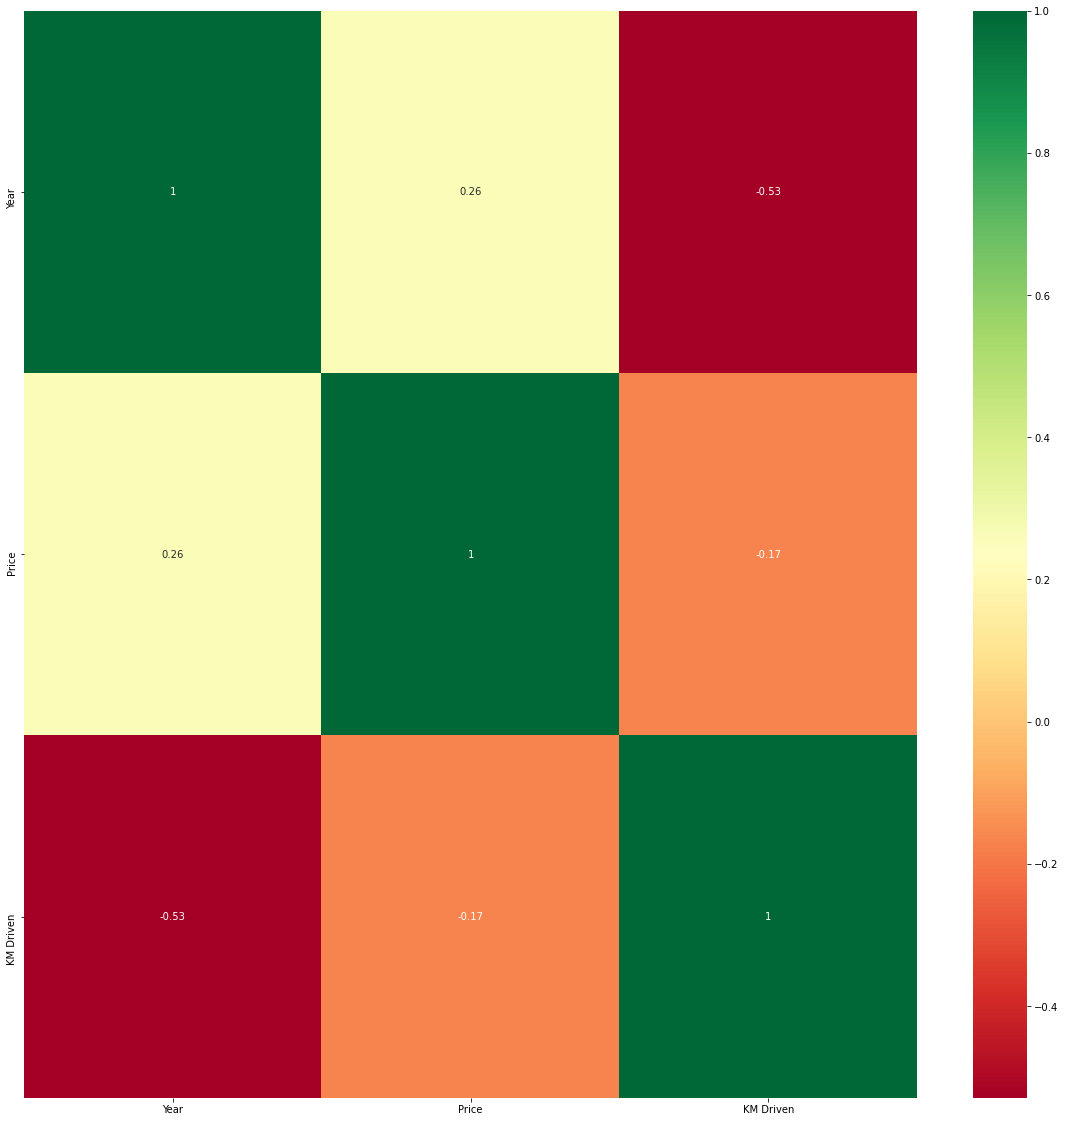

In [4]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [5]:
df['KM Driven'].value_counts()

65000    66
55000    61
45000    53
60000    52
70000    50
         ..
33126     1
18775     1
41298     1
53560     1
32772     1
Name: KM Driven, Length: 1215, dtype: int64

Year represent the year in which car have been purchased so how we can estimate the number of year car has been used ? number of year car has been used = current year — previous year So as we are in 2021 and car is of 2014 then number of years it’s been used will be :- number of year car has been used=2021–2014=7 to print number of year car has been used we need to add a column which represent current year.

In [6]:
df["Current_Year"]=2021

In [7]:
df["No_of_years"]=df["Current_Year"]-df["Year"]
df=df.drop(["Current_Year","Year"],axis=1)
df.head()

,Model,Price,KM Driven,Fuel_Type,Registration,No_of_years
0,Renault Kwid 1.0 RXL Edition,300000,21027,Petrol,Noida,4
1,Hyundai i10 Magna,140000,75000,Petrol,Noida,13
2,Maruti Suzuki Ertiga ZXi Plus,950000,18655,Petrol,Delhi,2
3,Ford EcoSport Trend + 1.5L TDCi,710000,42000,Diesel,Delhi,4
4,Hyundai Creta 1.6 SX Plus AT Petrol,1075000,39270,Petrol,Delhi,4


In [8]:
df.describe()

,Price,KM Driven,No_of_years
count,4.135000e+03,4135.000000,4135.000000
mean,9.608445e+05,48897.844015,5.539299
std,1.394934e+06,32976.643587,2.931213
min,6.900000e+04,65.000000,0.000000
25%,3.650000e+05,26000.000000,3.000000
50%,5.750000e+05,46000.000000,5.000000
75%,9.725000e+05,65294.000000,8.000000
max,2.550000e+07,650000.000000,20.000000


On an average car has been driven 48897 kilometres and max distance the car has been traveled is 650000 kilometres. The car with highest selling price present in data set is 2.5 cr. Maximum number of years car has been used and then come for sell is 20 years.This is how we make conclusion with statistical description of datase

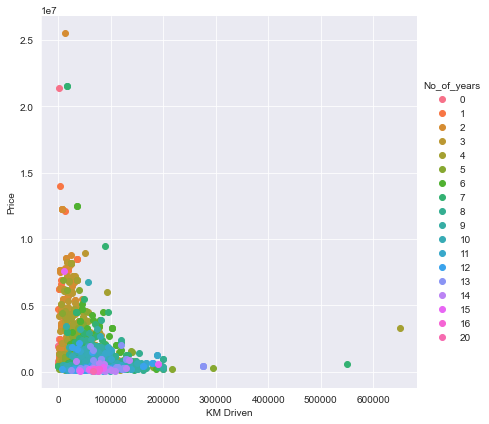

In [9]:
sns.set_style("darkgrid")
sns.FacetGrid(df,hue="No_of_years",height=6).map(plt.scatter,"KM Driven","Price").add_legend()
plt.show()

More number of Years you will use your car lesser the amount you will get and lesser the car would be driven higher will be the cost.

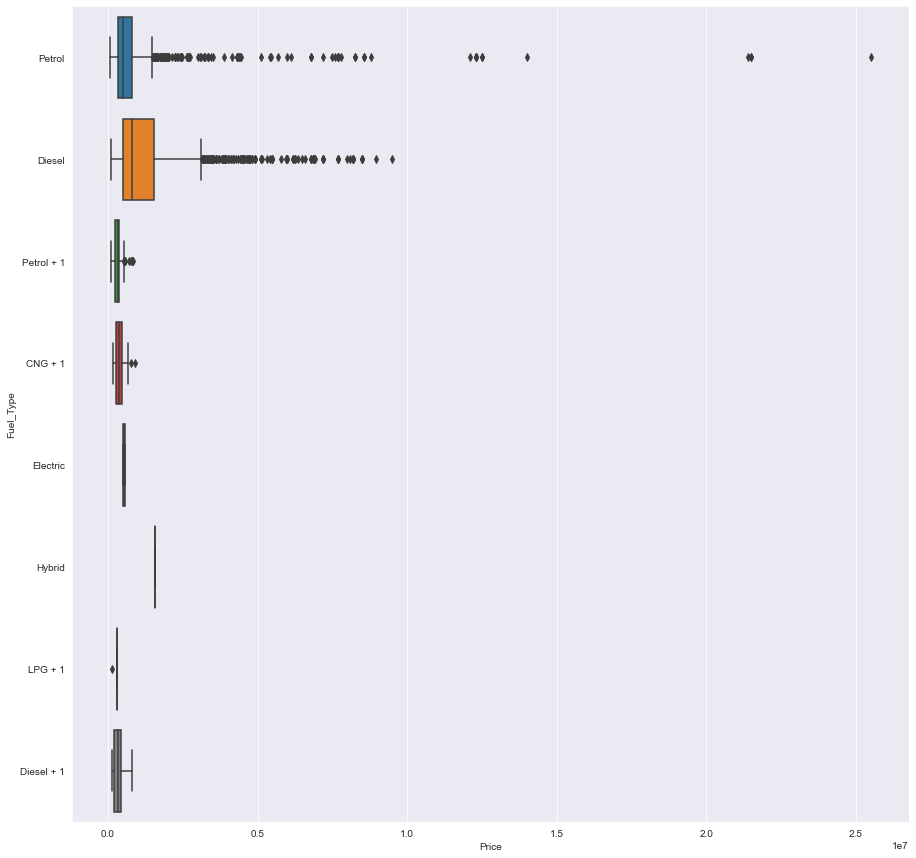

In [10]:
plt.figure(figsize=(15,15))
sns.boxplot(x='Price', y='Fuel_Type', data=df)

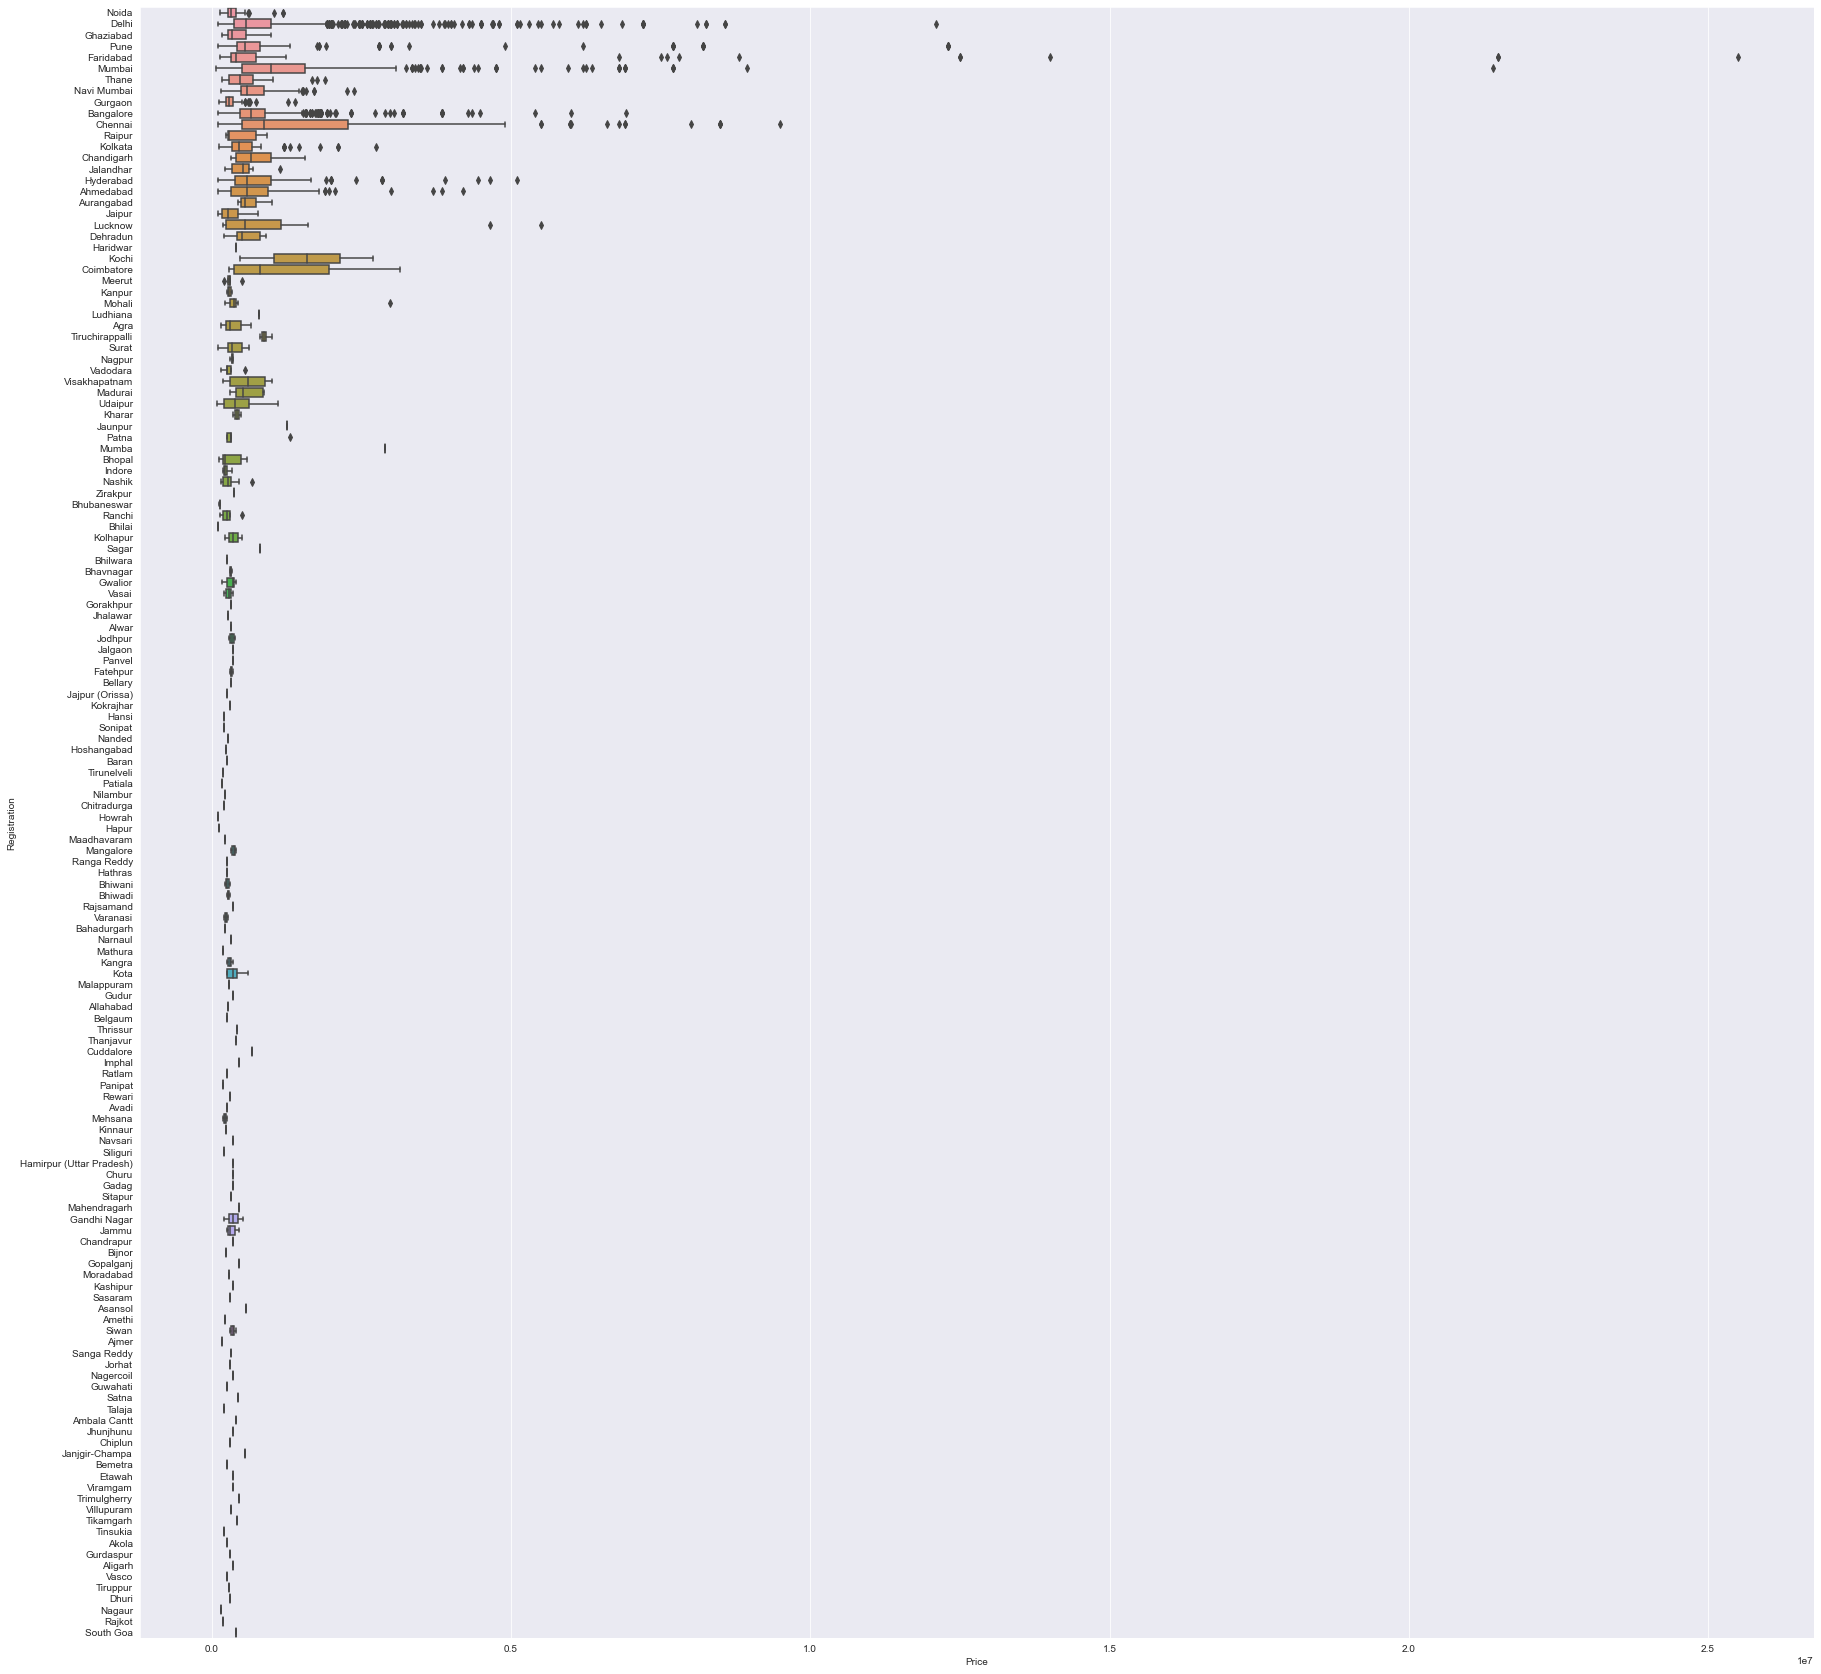

In [11]:
plt.figure(figsize=(30,30))
sns.boxplot(x='Price', y='Registration', data=df)

[3.66974449e-07 1.85436687e-08 4.27930816e-09 2.28229769e-09
 6.65670158e-10 9.50957369e-11 0.00000000e+00 0.00000000e+00
 2.85287211e-10 9.50957369e-11]
[   69000.  2612100.  5155200.  7698300. 10241400. 12784500. 15327600.
 17870700. 20413800. 22956900. 25500000.]


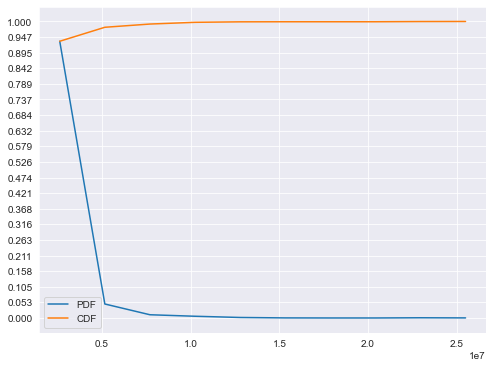

In [12]:
df_Price=df.loc[:,"Price"]
count,bin_edges=np.histogram(df_Price,bins=10,density=True)  #density=True gives normalized form od bin_edges and count
print(count)
print(bin_edges)
PDF=count/sum(count)
CDF=np.cumsum(PDF)  #cdf is sum of all pdf values
plt.figure(figsize=(8,6))
plt.plot(bin_edges[1:],PDF,label="PDF")
plt.plot(bin_edges[1:],CDF,label="CDF")
plt.yticks(np.linspace(0,1,20))
plt.legend(loc="lower left")

In [13]:
from sklearn import preprocessing
import pandas as pd
le = preprocessing.LabelEncoder()

df[['Model', 'Registration','Fuel_Type']] = df[['Model', 'Registration','Fuel_Type']].apply(le.fit_transform)

CHECKING CORRELATION

In [14]:
dfcor=df.corr()
dfcor

,Model,Price,KM Driven,Fuel_Type,Registration,No_of_years
Model,1.000000,-0.142802,0.023684,-0.015371,-0.184247,-0.087325
Price,-0.142802,1.000000,-0.169950,-0.192272,0.005899,-0.257796
KM Driven,0.023684,-0.169950,1.000000,-0.312940,0.014915,0.529104
Fuel_Type,-0.015371,-0.192272,-0.312940,1.000000,0.005150,-0.073589
Registration,-0.184247,0.005899,0.014915,0.005150,1.000000,0.074039
No_of_years,-0.087325,-0.257796,0.529104,-0.073589,0.074039,1.000000


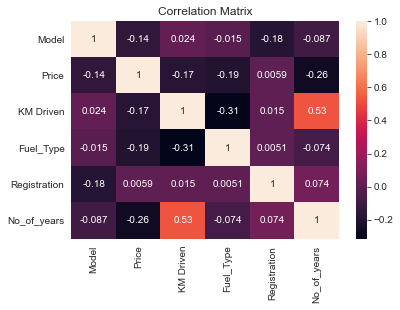

In [15]:
plt.figure(figsize=(6,4))
sns.heatmap(dfcor,annot=True)
plt.title("Correlation Matrix")
plt.show()

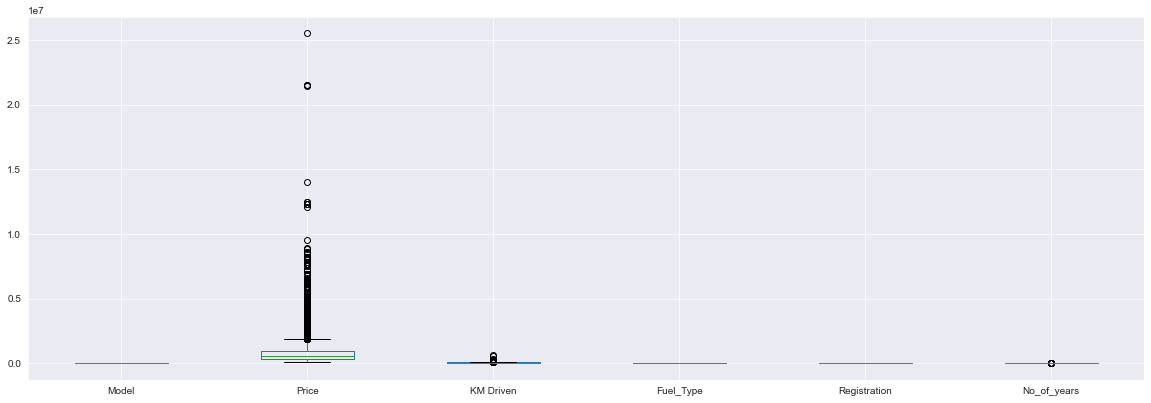

In [16]:
#Plotting boxplots to check outliers
df.iloc[:,0:23].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

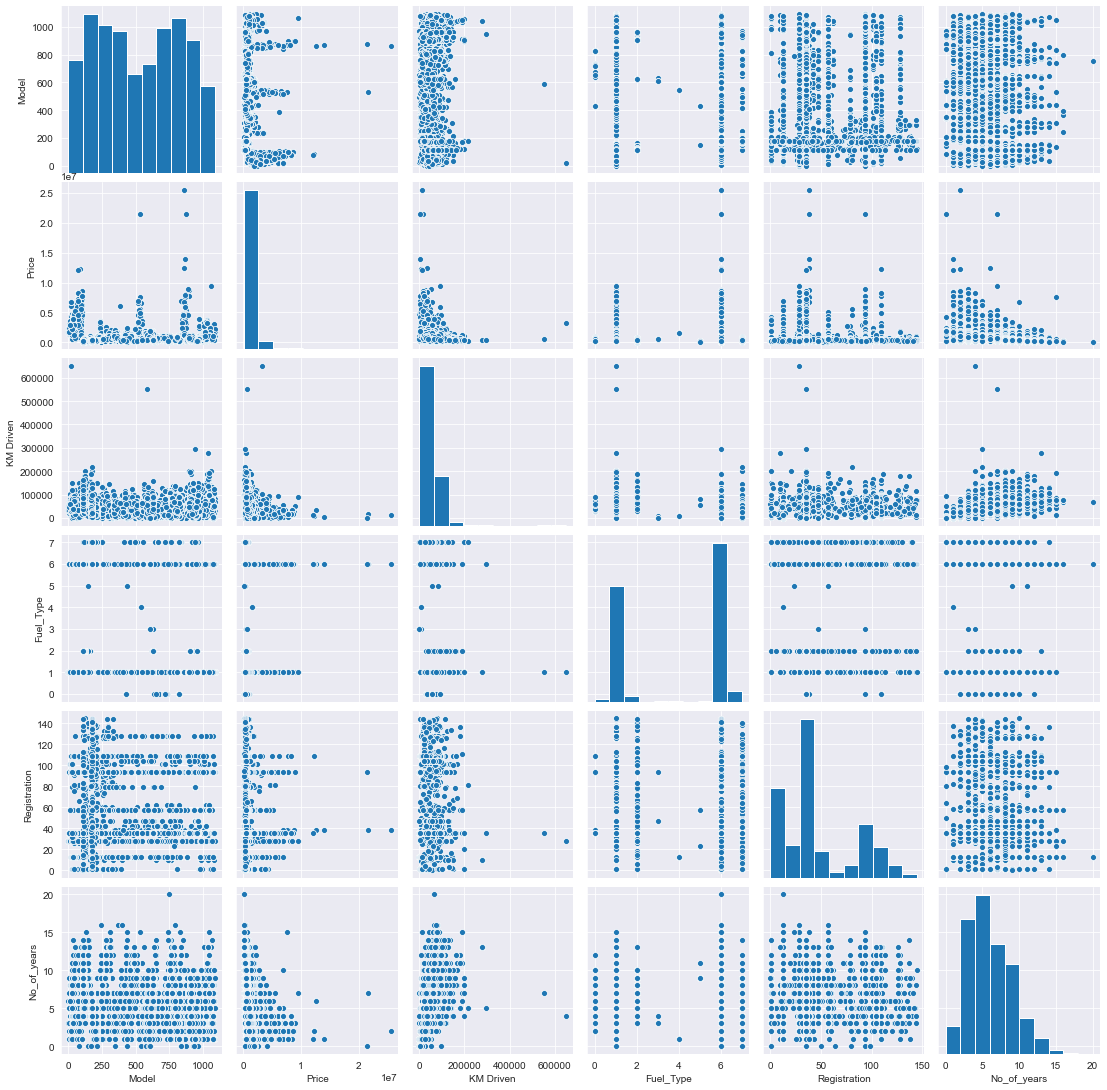

In [17]:
sns.pairplot(df)
plt.show()

In [18]:
df.skew() # Checking Skewness

Model           0.036166
Price           6.571627
KM Driven       3.383394
Fuel_Type      -0.310851
Registration    0.852286
No_of_years     0.624351
dtype: float64

In [19]:
skew=("Price","KM Driven")
for col in skew :
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])

In [20]:
df.skew()

Model           0.036166
Price           0.844181
KM Driven      -1.650140
Fuel_Type      -0.310851
Registration    0.852286
No_of_years     0.624351
dtype: float64

In [21]:
y= df.Price
X= df.drop('Price',axis=1)

In [22]:
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(3308, 5) (3308,)
(827, 5) (827,)


Choosing best fit model for our dataset : checking which model will be best for our dataset as from pair plot it is clear that we have to take model which do prediction on non linear and combination of categorical and numerical data that are decision tree,random forest and xgboost then we will check which model will have high accuracy based on that we select the model. We can choose our best fit model using cross validation score.

In [23]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()   
X_train= sc.fit_transform(X_train)
X_test= sc.transform(X_test)

In [24]:
!pip install xgboost

In [25]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn import model_selection
models=[]
models.append(('CART', DecisionTreeRegressor()))
models.append(("KNN",KNeighborsRegressor()))
models.append(("RF", RandomForestRegressor()))
models.append(("XGBOOST", XGBRegressor()))
names=[]
result=[]
for name,model in models:
    k_fold=model_selection.KFold(n_splits=10,shuffle=True,random_state=7)
    score=model_selection.cross_val_score(model,X_train,y_train,cv=k_fold,scoring="r2")
    result.append(score)
    names.append(name)
    print(name,score.mean(),score.std())

CART 0.8111265703289311 0.04048843684700826
KNN 0.6744827848047811 0.04153984622285465
RF 0.8832769006676779 0.027668687949147334
XGBOOST 0.9277631137200366 0.018849164242222247


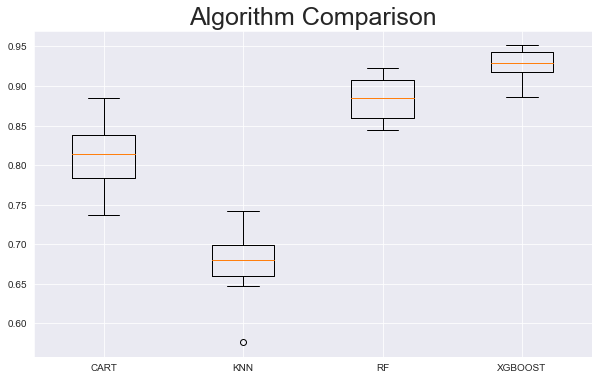

In [26]:
fig = plt.figure(figsize=(10,6))
plt.boxplot(result,labels=names)
plt.title('Algorithm Comparison',fontsize=25)
plt.show()

As we see above accuracy score result we can say that XGboost gives better accuracy with very low standard deviation hence we should go with XGboost.

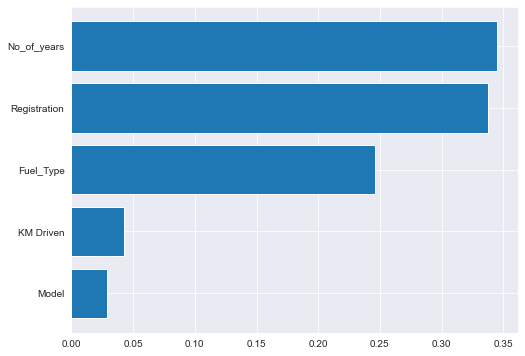

In [27]:
plt.figure(figsize=(8,6))
model=XGBRegressor()
model.fit(X,y)
importance=np.sort(model.feature_importances_)
plt.barh(X.columns,importance)
plt.show()

No of years,registration,Fuel type make most impact to output prediction.

Hyper parameter tuning : By using Hyper parameter we search for best parameter of the given model so that we can obtain best result out of the given model.

In [32]:
data_dmatrix = xgb.DMatrix(data=X_train,label=y_train)
params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

[23:45:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[23:45:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[23:45:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.


In [33]:
A, b = X.iloc[:,:-1],X.iloc[:,-1]
data_dmatrix = xgb.DMatrix(data=A,label=b)

params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 3, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

[23:45:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[23:45:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[23:45:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.


In [34]:
cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,5.383734,0.049533,5.383140,0.109223
1,5.006739,0.046746,5.006506,0.111667
2,4.668018,0.048981,4.668222,0.107488
3,4.378196,0.048223,4.379096,0.109061
4,4.108544,0.074436,4.112253,0.085904


Check train test accuracy of dataset

In [42]:
from sklearn.metrics import r2_score 
xgb=XGBRegressor(n_estimators= 130, max_depth=3,booster= 'dart')
xgb.fit(X_train,y_train)
y_train_predicted=xgb.predict(X_train)
y_test_predicted=xgb.predict(X_test)
print("Train set accuracy: ",r2_score(y_train,y_train_predicted))
print("Test set accuracy : ",r2_score(y_test,y_test_predicted))

Train set accuracy:  0.946614242063528
Test set accuracy :  0.8892380812245346


Understanding predicted values

In [43]:
Result=pd.DataFrame({"Actual":y_test,"Predicted":y_test_predicted})
Result.head(10)

,Actual,Predicted
2924,12.807655,12.615716
1210,13.473022,13.259460
2577,12.594734,12.758731
1752,13.038984,12.885543
1095,12.487489,12.459957
2615,13.493928,13.534852
1720,12.994532,13.091901
298,14.626441,15.142260
912,13.534474,13.425991
2529,13.120363,13.285119


In [48]:
import joblib #Saving Model
joblib.dump(xgb,"Used_car_price.csv.obj")

['Used_car_price.csv.obj']

In [49]:
p=joblib.load("Used_car_price.csv.obj")